In [1]:
import detectron2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, r"C:\object_detection\final_dataset\Resize_image\train\train_output.json", r"C:\object_detection\final_dataset\Resize_image\train")
register_coco_instances("my_dataset_test", {}, r"C:\object_detection\final_dataset\Resize_image\test\test_output.json", r"C:\object_detection\final_dataset\Resize_image\test")



In [3]:
dfu_metadata = MetadataCatalog.get("my_dataset_train")
dfu_dicts = DatasetCatalog.get("my_dataset_train")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [4]:
%load_ext tensorboard

In [5]:
#from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter()

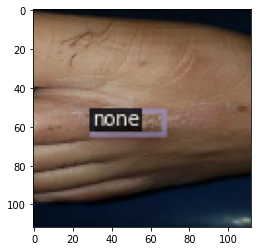

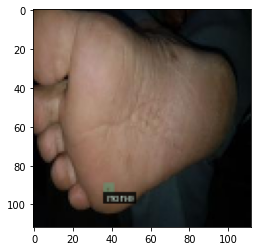

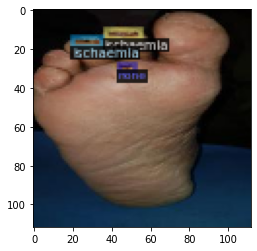

In [6]:
import random
import cv2
import matplotlib.pyplot as plt

for d in random.sample(dfu_dicts, 3):
    img = cv2.imread(d["file_name"])
    #writer.add_image('my_image', img, 0)
    v = Visualizer(img[:, :, ::-1], metadata=dfu_metadata, scale=0.5)
    v = v.draw_dataset_dict(d)
    #plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
#writer.close()

In [8]:
from d2go.runner import GeneralizedRCNNRunner
from d2go.model_zoo import model_zoo
import os

def prepare_for_launch():
    runner = GeneralizedRCNNRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("faster_rcnn_fbnetv3a_dsmask_C4.yaml"))
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATASETS.TRAIN = ("my_dataset_train",)
    cfg.DATASETS.TEST = ("my_dataset_test",)
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("faster_rcnn_fbnetv3a_dsmask_C4.yaml")  # Let training initialize from model zoo
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
    cfg.SOLVER.MAX_ITER = 1200    # 600 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
    cfg.SOLVER.STEPS = []        # do not decay learning rate
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
    # NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()

In [9]:
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=False)

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, 

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.063
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.007
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.024
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.078
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.184
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.189
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.193
 Average Recall     (AR) @[ IoU=0.50:0.

{'model_final': CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './output\\model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'FBNetV2C4Backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': [], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32, 64, 96, 128, 160]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'FBNetV2RpnHead', 'IN_FEATURES': ['trunk3'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_LOSS_TYPE': 'smooth_l1', 'BBOX_REG_LOSS_WEIGHT': 1.0, 'BBOX_REG_WEIGHTS': (1.0, 1.0, 1.0, 1.0

In [10]:
import copy
from detectron2.data import build_detection_test_loader
from d2go.export.api import convert_and_export_predictor
from d2go.export.d2_meta_arch import patch_d2_meta_arch

import logging

# disable all the warnings
previous_level = logging.root.manager.disable
logging.disable(logging.INFO)

patch_d2_meta_arch()

pytorch_model = runner.build_model(cfg, eval_only=True)
pytorch_model.cpu()

datasets = cfg.DATASETS.TRAIN[0]
data_loader = runner.build_detection_test_loader(cfg, datasets)

predictor_path = convert_and_export_predictor(
  copy.deepcopy(cfg),
  copy.deepcopy(pytorch_model),
  "torchscript_int8@tracing",
  './',
  data_loader
)

# recover the logging level
logging.disable(previous_level)

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, num_batches_tracked, running_mean, running_var, weight}
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.conv.weight
  roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pwl.bn.{bias, num_batches_tracked, running_mean, running_var, 

additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
additional_fuser_method_mapping None
a

C:\Users\Karthik\anaconda3\envs\capstone_3\lib\site-packages\torch\ao\quantization\observer.py:886: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  src_bin_begin // dst_bin_width, 0, self.dst_nbins - 1
C:\Users\Karthik\anaconda3\envs\capstone_3\lib\site-packages\torch\ao\quantization\observer.py:891: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='f

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



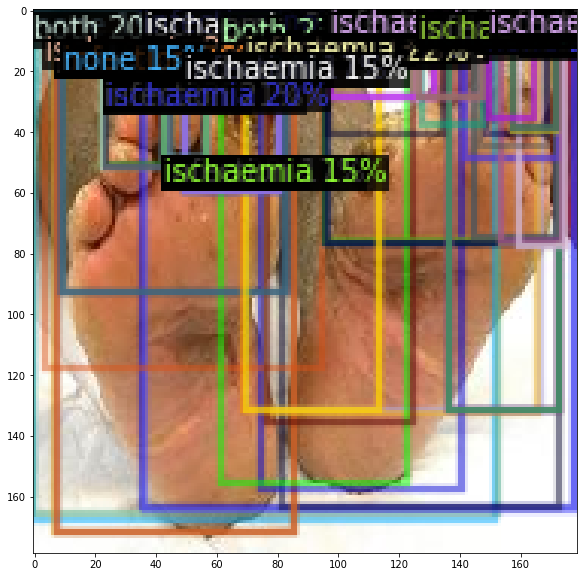

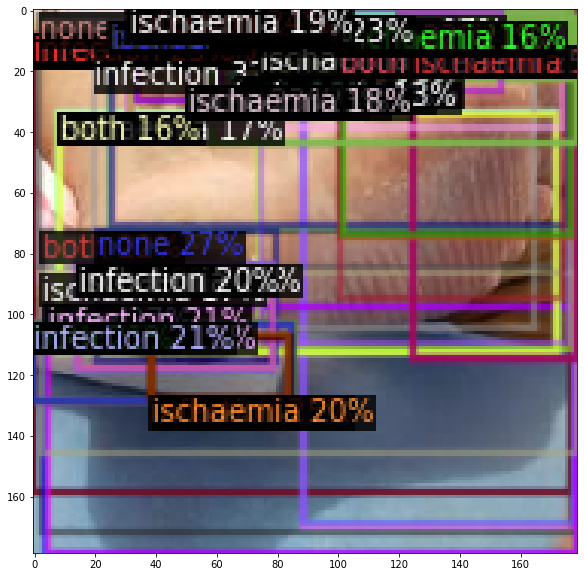

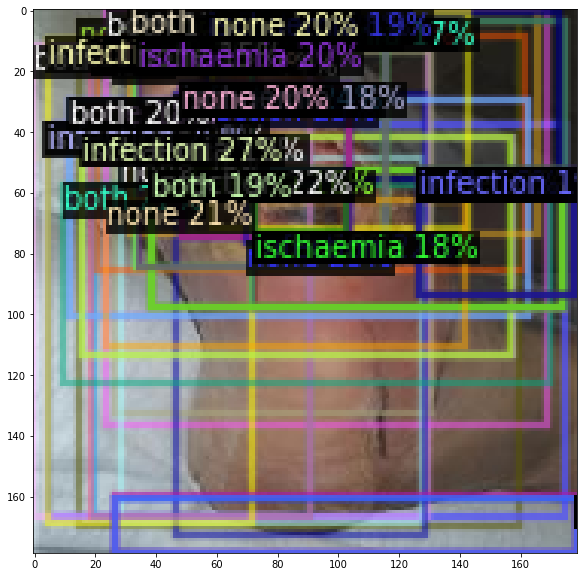

In [11]:
from mobile_cv.predictor.api import create_predictor
from d2go.utils.demo_predictor import DemoPredictor

model = create_predictor(predictor_path)
predictor = DemoPredictor(model)

dataset_dicts = DatasetCatalog.get('my_dataset_test')
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=dfu_metadata, scale=0.8)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

In [12]:
metrics = runner.do_test(cfg, model)

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.008
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.004
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.033
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.

In [13]:
print(metrics)

OrderedDict([('default', OrderedDict([('my_dataset_test', OrderedDict([('bbox', {'AP': 0.20580150173647402, 'AP50': 0.7644825691523885, 'AP75': 0.04254510921328799, 'APs': 0.04504504504504504, 'APm': 0.24309323207978767, 'APl': 0.43456713066465064, 'AP-both': 0.3051516078960966, 'AP-infection': 0.33155306860184836, 'AP-ischaemia': 0.15305891006795402, 'AP-none': 0.033442420379996916})]))]))])


In [14]:
%tensorboard --logdir=runs